# Part 1:

## 1- Importing the necessary libraries

In [284]:
import pandas as pd
import numpy as np

## 2- Reading the HTML table from the population website to a pandas dataframe

In [285]:
url_of_website = 'https://www.citypopulation.de/en/egypt/greatercairo/'
column_names = ['Neighborhood', 'Governorate', 'Population'] 

# Initiating the dataframe
Cairo_data_df = pd.DataFrame(columns=column_names)

# Reading the HTML table from the website
Cairo_data = pd.read_html(url_of_website)
Cairo_data[0].drop(['Native','Status','PopulationCensus1996-11-19','PopulationCensus2006-11-11'],axis=1 , inplace=True)
Cairo_data[0]
Cairo_data_df['Governorate'] = Cairo_data[0]['Governorate']
Cairo_data_df['Neighborhood'] = Cairo_data[0]['Name']
Cairo_data_df['Population'] = Cairo_data[0]['PopulationEstimate2019-07-01']
Cairo_data_df.dropna(axis=0, inplace=True)
Cairo_data_df.head()


,Neighborhood,Governorate,Population
0,15 Māyū [15th of May City],Al-Qāhirah,96522
1,'Ābidīn,Al-Qāhirah,41605
2,Ad-Darb al-Aḥmar,Al-Qāhirah,60336
3,Ad-Duqqī,Al-Jīzah,73309
4,'Ain Schams,Al-Qāhirah,633798


## 4- Apply groupby ‘Governorate’ and summed by Population on the dataframe

In [286]:
Cairo_data_df_new = Cairo_data_df.groupby('Governorate')['Population'].sum()
Cairo_data_df_new

Governorate
Al-Jīzah         7056914
Al-Qalyūbyah     3742834
Al-Qāhirah       9840591
Ash-Sharqiyah     234770
Name: Population, dtype: int64

In [287]:
Population = Cairo_data_df_new
Governorates = ['Al-Jīzah','Al-Qalyūbyah','Al-Qāhirah','Ash-Sharqiyah']
Cairo_pop = pd.DataFrame({'Governorate': Governorates,
                   'Population': Population}, index=Governorates)
Cairo_pop

,Governorate,Population
Al-Jīzah,Al-Jīzah,7056914
Al-Qalyūbyah,Al-Qalyūbyah,3742834
Al-Qāhirah,Al-Qāhirah,9840591
Ash-Sharqiyah,Ash-Sharqiyah,234770


## 5- Plot a bar chart for Governorates population in Cairo

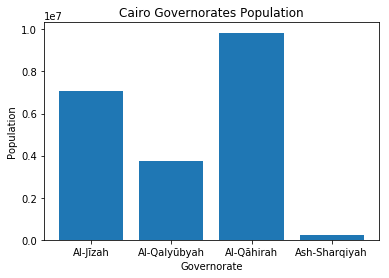

In [288]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
x_axis = np.arange(Cairo_pop['Governorate'].shape[0])
#performance = [10,8,6,4,2,1]

plt.bar(Cairo_pop['Governorate'], Cairo_pop['Population'], align='center')
plt.xticks(x_axis, Cairo_pop['Governorate'])
plt.xlabel('Governorate')
plt.ylabel('Population')
plt.title('Cairo Governorates Population')

plt.show()

## 6- Target the governorate with the highest population

In [230]:
Max_Gov = Cairo_pop.loc[Cairo_pop['Population'].idxmax()][0]
Max_Gov

'Al-Qāhirah'

## 7- Getting the neighborhoods data by using Foursquare

In [231]:
CLIENT_ID = 'YFPJU4FUJISRJZFAC3CYM0XVD4SWBYMMLJYHRYDNJTFMPFV0' # your Foursquare ID

CLIENT_SECRET = 'AXXB3G4UGM23JQGEBAXBQZHDQORPJBRN1EQJIAWNCI2XNATU' # your Foursquare Secret

VERSION = '20180605' # Foursquare API version

print('My credentails: ***')

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails: ***
CLIENT_ID: YFPJU4FUJISRJZFAC3CYM0XVD4SWBYMMLJYHRYDNJTFMPFV0
CLIENT_SECRET:AXXB3G4UGM23JQGEBAXBQZHDQORPJBRN1EQJIAWNCI2XNATU


## 8- Use geocoder to get the coordinates of the highest populated governorate

In [233]:
from geopy.geocoders import Nominatim
address=Max_Gov
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {}, Egypt is {}, {}.'.format(Max_Gov,latitude, longitude))

The geograpical coordinate of Al-Qāhirah, Egypt is 30.048819, 31.243666.


In [234]:
gov_lat=latitude
gov_lon=longitude
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID, 
CLIENT_SECRET, 
VERSION, 
gov_lat, 
gov_lon, 
radius, 
LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YFPJU4FUJISRJZFAC3CYM0XVD4SWBYMMLJYHRYDNJTFMPFV0&client_secret=AXXB3G4UGM23JQGEBAXBQZHDQORPJBRN1EQJIAWNCI2XNATU&v=20180605&ll=30.048819,31.243666&radius=500&limit=100'

In [235]:
import json
from pandas.io.json import json_normalize
import requests
results = requests.get(url).json()
#results

In [278]:
results['response']['groups'][0]
results['response']['groups'][0]['items'][0]['reasons']['items'][0]['summary']

'This spot is popular'

In [74]:
#results['response']['groups'][0]['items']

In [236]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### A function which specifies if a certain venue is popular or not

In [280]:
# function that tells is the Neighborhood is popular
# Needs Modification
def is_popular(row):
    try:
        popular_list = row['response']['groups'][0]['items'][0]['reasons']['items'][0]['summary']
    except:
        print('There is no information about the popularity of this place')
        
    if len(popular_list) == 0:
        return None
    else:
        return popular_list

In [238]:
#results['response']['groups'][0]['items'][0]['reasons']['items'][0]['summary']
results['response']['groups'][0]['items']
venues = results['response']['groups'][0]['items']
venues
nearby_venues = json_normalize(venues) # flatten JSON
#nearby_venues

## 9- Getting the data ready

In [246]:
venues = results['response']['groups'][0]['items']
venues
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.location.city','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','reasons.items']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues[nearby_venues['items'].str.contains("This spot is popular") == True]['items'] = 'Popular'
nearby_venues.drop(['city'],axis=1,inplace=True)
nearby_venues

,name,categories,lat,lng,items
0,Halawa (حلاوه),Clothing Store,30.050450,31.244201,"[{'summary': 'This spot is popular', 'type': '..."
1,Simonds,Coffee Shop,30.049971,31.242260,"[{'summary': 'This spot is popular', 'type': '..."
2,Happy City Roof Bar,Hotel Bar,30.046346,31.243932,"[{'summary': 'This spot is popular', 'type': '..."
3,Dar El Maaref (دار المعارف),Bookstore,30.050467,31.242328,"[{'summary': 'This spot is popular', 'type': '..."
4,El Abd (العبد),Pastry Shop,30.049617,31.239840,"[{'summary': 'This spot is popular', 'type': '..."
5,Costa Coffee,Coffee Shop,30.048983,31.242256,"[{'summary': 'This spot is popular', 'type': '..."
6,Kunst Gallery & Cafe,Café,30.049947,31.242113,"[{'summary': 'This spot is popular', 'type': '..."
7,Al Gomhuria Theatre (مسرح الجمهورية),Theater,30.046137,31.246186,"[{'summary': 'This spot is popular', 'type': '..."
8,Koshary El Tahrir (كشري التحرير),Egyptian Restaurant,30.050429,31.240675,"[{'summary': 'This spot is popular', 'type': '..."
9,West El Balad,Café,30.047301,31.243266,"[{'summary': 'This spot is popular', 'type': '..."


In [264]:
nearby_venues['items'][0]['reasons']['items'][0]['summary'].str.contains("This spot is popular") == True
#type(nearby_venues['items'][0])

TypeError: string indices must be integers

In [281]:
is_popular(results)

'This spot is popular'

In [282]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

# All requested packages already installed.



## 10- Plot the results on Cairo map

In [283]:
Cairo_map = folium.Map(location=[30.048819, 31.243666],zoom_start=15)

for lat,lng,venue in zip(nearby_venues['lat'],nearby_venues['lng'],nearby_venues['name']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(Cairo_map)
Cairo_map